In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_sql('select SETTLEMENT_DATE, AMOUNT from payments', sqlite3.connect('assets/sebra/sebra.db'))
df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE']).dt.round('D')
df['WEEKDAY'] = df['SETTLEMENT_DATE'].dt.day_of_week
df.head()

,SETTLEMENT_DATE,AMOUNT,WEEKDAY
0,2025-01-07,8419.93,1
1,2025-01-10,5400.00,4
2,2025-01-15,94783.72,2
3,2025-01-15,27600.43,2
4,2025-01-15,5760.00,2


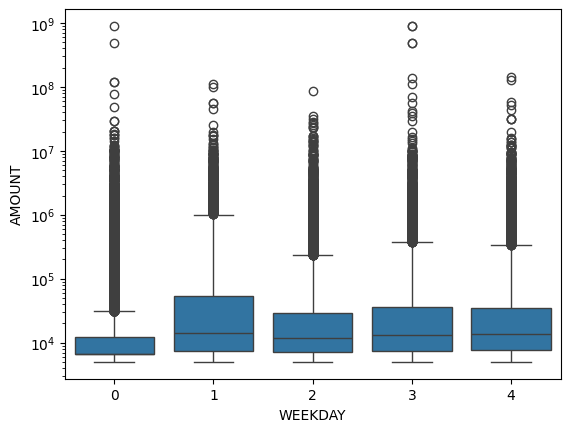

In [3]:
sns.boxplot(data=df, x='WEEKDAY', y='AMOUNT', log_scale=True)
plt.show()

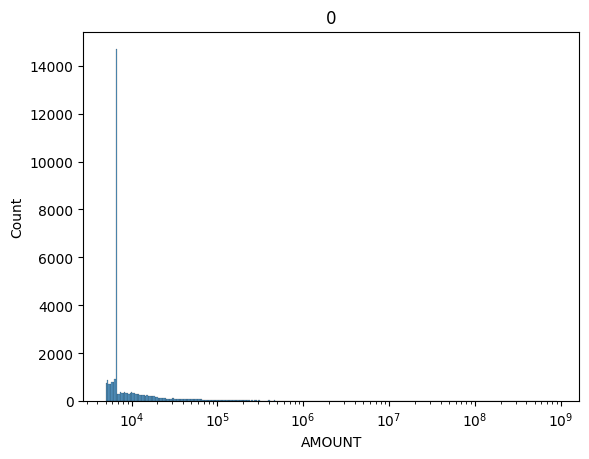

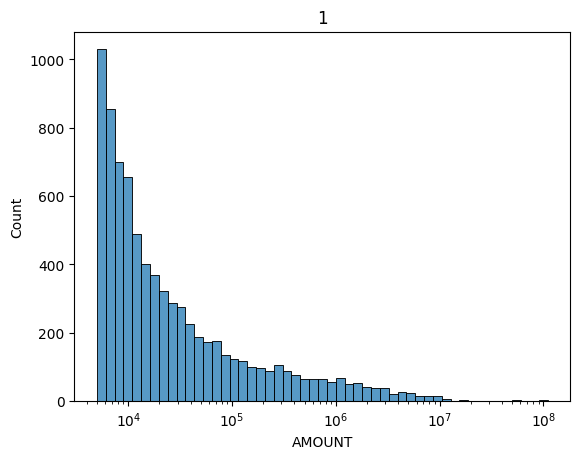

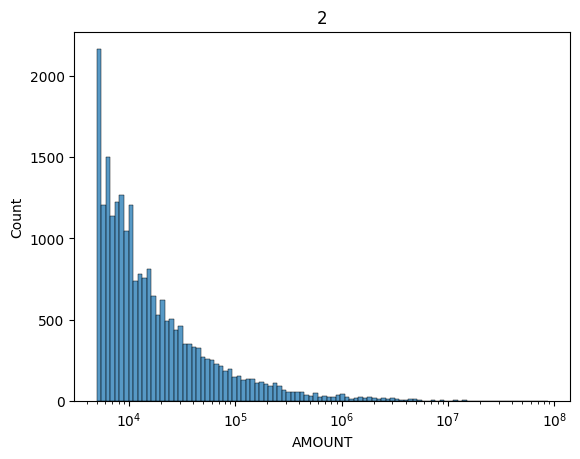

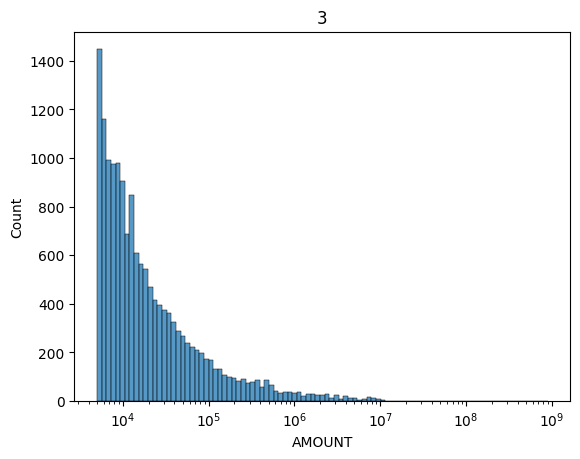

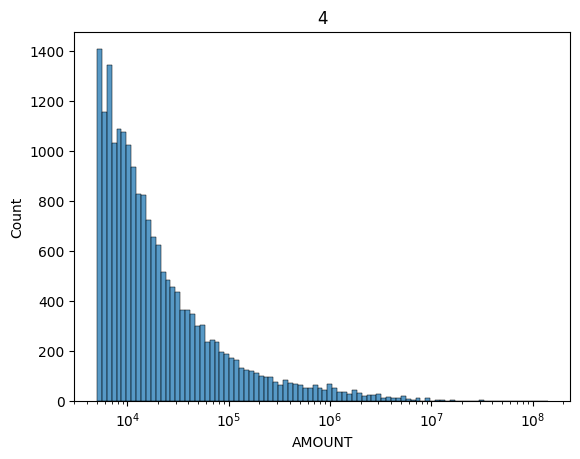

In [4]:
for g, d in df.groupby('WEEKDAY')['AMOUNT']:
    sns.histplot(d, log_scale=True)
    plt.title(g)
    plt.show()